In [8]:
%load_ext line_profiler
import matplotlib.pyplot as plt
from random import sample
%matplotlib inline

from tqdm import tqdm

import numpy as np
import json

from dpipe.config import get_resource_manager
from dpipe.medim.visualize import slice3d
from dpipe.medim.augmentation import spatial_augmentation_strict

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [2]:
rm = get_resource_manager('/home/krivov/deep_pipe/config_examples/brats_deepmedic_els.config')

rm.set('data_path', '/cobrain/groups/ml_group/data/brats2017/train/')

dataset = rm.dataset

patient_ids = dataset.patient_ids

In [3]:
sizes = np.array([dataset.load_segm(patient).size for patient in tqdm(patient_ids)])
cancer_sizes = np.array([np.sum(dataset.load_segm(patient) != 0) for patient in tqdm(patient_ids)])

100%|██████████| 285/285 [00:01<00:00, 181.01it/s]


In [5]:
np.sum(sizes) / (64 * 9 ** 3)

19699.508723422496

In [27]:
print(f'Cancer share {cancer_sizes.mean() / sizes.mean()}')
print(sizes.mean() / (9 ** 3), cancer_sizes.mean() / (9 ** 3))

Cancer share 0.031053532081454196
4423.74932737 137.373041658


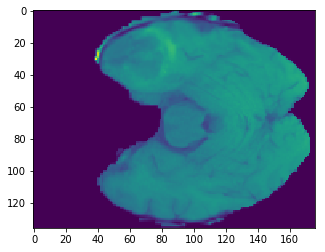

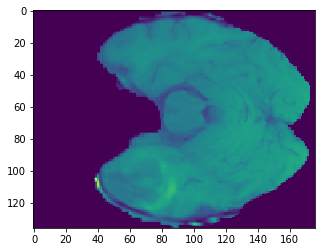

In [18]:
plt.imshow(x[0, ..., 40])
plt.show()
plt.imshow(np.flip(x, axis=-3)[0, ..., 40])
plt.show()

In [3]:
p = patient_ids[1]

x, y = dataset.load_mscan(p), dataset.load_msegm(p)

In [4]:
slice3d(*x, ~y.any(axis=0), *y, max_columns=4)

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=131), Output()), _dom_classes=('widget-interact',))

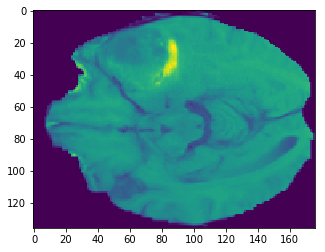

In [5]:
plt.imshow(x[0, ..., 50])

In [7]:
%lprun -f spatial_augmentation_strict x_a, y_b = spatial_augmentation_strict(x, y, axes=(-3, -2, -1), order=1)

/home/krivov/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [45]:
#x_i, y_i = x.copy(), y.copy()
xa, ya = spatial_augmentation_strict(x, y, axes=(-3, -2, -1), order=1)
x.shape, xa.shape

slice3d(*xa, ~ya.any(axis=0), *ya, max_columns=4)

/home/krivov/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=154), Output()), _dom_classes=('widget-interact',))

In [37]:
xa.min(axis=(-3, -2, -1))

array([-0.8871243, -0.8871243, -0.8871243, -0.8871243], dtype=float32)

In [239]:
slice3d(*xa)

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=59), Output()), _dom_classes=('widget-interact',))

In [110]:
%%timeit
np.flip(x[slices]

1.01 µs ± 20.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [92]:
y = y.astype(float)